In [3]:
import os
import pandas as pd
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader,Dataset
from PIL import Image
import torchvision.transforms as transforms
from torchvision import models

In [4]:
import torch
from sklearn import preprocessing

In [5]:
os.listdir('train')

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

# Don't execute if train.csv is created  , Try stacknet?

In [3]:
train=pd.DataFrame()
train['paths']=[]
train['Labels']=[]

In [4]:
for category in os.listdir('train'):
    length=len(os.listdir(f'train/{category}'))
    df_temp=pd.DataFrame()
    df_temp['paths']=[None]*length
    df_temp['Labels']=[category]*length

    for i in range(length):
        path=os.path.join(f'train\\{category}',os.listdir('train/airplane')[i])
        df_temp['paths'][i]=path

    train=train.append(df_temp)

In [7]:
train.to_csv('train.csv',index=False)

# done

In [6]:
train=pd.read_csv('train.csv')
le=preprocessing.LabelEncoder()
train['Target']=le.fit_transform(train['Labels']) 
train=train.sample(frac=1).reset_index().drop('index',axis=1)

In [7]:

train.head()

,paths,Labels,Target
0,train\bird\2928.png,bird,2
1,train\airplane\4975.png,airplane,0
2,train\dog\4492.png,dog,5
3,train\airplane\4222.png,airplane,0
4,train\automobile\2771.png,automobile,1


In [8]:
transform=transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
     mean=[0.485, 0.456, 0.406],
     std=[0.229, 0.224, 0.225]  )
    
])

In [9]:
class Dataset(Dataset):
    def __init__(self,transform=None,training=True):
        self.X=train['paths']
        y=torch.tensor(train['Target'].values)
        self.y=y.view(-1).long()
        self.transform=transform
        if training:
            self.X=list(self.X[0:48000].values)
            self.y=self.y[0:48000]
            self.len=len(self.X)
        else:
            self.X=list(self.X[48000:].values)
            self.y=self.y[48000:]
            self.len=len(self.X)
        
    def __len__(self):
        return self.len
        
    def __getitem__(self,idx):
        image=Image.open(self.X[idx]).convert('RGB')
        label=self.y[idx]

        if self.transform:
            image=self.transform(image)

        return image,label
        
            

In [10]:
dataset=Dataset()

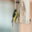

In [11]:
dataset[0][0]

In [12]:
model

NameError: name 'model' is not defined

In [13]:
model= models.densenet161(pretrained=True)
for param in model.parameters():
    param.requires_grad = False
num_ftrs = model.classifier.in_features
model.classifier = nn.Linear(num_ftrs, 10)
device=torch.device("cuda:0")
model =model.to(device)

In [14]:
dataset_train=Dataset(transform=transform,training=True)
dataset_val=Dataset(transform=transform,training=False)

In [15]:
data_loader=DataLoader(dataset=dataset_train,batch_size=50) #more batch_size could fail
validation_loader=DataLoader(dataset=dataset_val,batch_size=50)
criterion=nn.CrossEntropyLoss()

optimizer=torch.optim.Adam([param for param in model.parameters() if param.requires_grad],lr=0.01)

In [16]:
n_epochs=5
accuracy_list=[]
loss_list=[]
loss_list=[]
n_test=len(dataset_val)
def train_model(n_epochs):
    epoch_completed=0
    for epoch in range(n_epochs):
        for x,y in data_loader:
            model.train()
            optimizer.zero_grad()
            x=x.to(device)
            y=y.to(device)
            z=model(x)
            loss=criterion(z,y)
            loss.backward()
            optimizer.step()
            print("batch_done")
        correct=0
        print("validation is starting")
        for x_test,y_test in validation_loader:
            model.eval()
            x_test=x_test.to(device)
            y_test=y_test.to(device)
            z=model(x_test)
            _,yhat=torch.max(z.data,1)
            correct += (yhat == y_test).sum().item()
        accuracy=correct/n_test
        loss_list.append(loss.data)
        accuracy_list.append(accuracy)
        epoch_completed+=1
        print(f"Epochs completed {epoch_completed}")

In [17]:
train_model(10)

batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done

batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done

batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done

batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done

batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done

batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done

batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done

batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done

batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done

batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
validation is starting
Epochs completed 7
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
b

batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done

batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done

batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done
batch_done

In [20]:
accuracy_list

[0.8115, 0.77, 0.7685, 0.797, 0.8065, 0.7955, 0.7935, 0.8, 0.8, 0.8055]

In [142]:
model.eval()
length=len(os.listdir('test'))
df_pred=pd.DataFrame()
df_pred['Filename']=[None]*length
df_pred['label']=[None]*length
for i,index in zip(os.listdir('test'),range(length)):
    df_pred['Filename'][index]=i
    test=Image.open(os.path.join('test',i))
    test=transform(test)
    batch=torch.unsqueeze(test,0)
    batch=batch.to(device)
    out=model(batch)
    _,pos=torch.max(out.data,1)
    label=le.inverse_transform([int(pos)])[0]
    df_pred['label'][index]=label
    print(label)

dog
deer
frog
bird
deer
dog
airplane
deer
dog
airplane
ship
dog
truck
truck
horse
cat
deer
dog
horse
frog
airplane
deer
truck
cat
ship
horse
ship
bird
airplane
automobile
cat
truck
deer
ship
bird
truck
airplane
frog
deer
ship
truck
ship
dog
horse
cat
truck
dog
airplane
airplane
ship
horse
deer
ship
airplane
automobile
bird
frog
deer
truck
frog
truck
airplane
horse
deer
deer
frog
bird
bird
dog
frog
cat
horse
truck
bird
horse
dog
dog
automobile
truck
dog
horse
cat
ship
truck
deer
horse
dog
dog
bird
truck
horse
cat
bird
cat
bird
cat
airplane
automobile
dog
bird
airplane
horse
ship
airplane
horse
cat
airplane
cat
cat
dog
horse
frog
bird
automobile
deer
dog
dog
truck
deer
cat
airplane
automobile
truck
cat
bird
dog
automobile
automobile
dog
ship
frog
frog
deer
airplane
cat
frog
bird
cat
truck
dog
deer
automobile
cat
automobile
truck
ship
automobile
frog
deer
cat
cat
horse
cat
horse
dog
airplane
horse
airplane
bird
bird
dog
truck
dog
bird
dog
bird
airplane
dog
truck
bird
bird
frog
deer
frog
a

horse
frog
deer
deer
airplane
frog
automobile
airplane
bird
deer
dog
airplane
cat
ship
frog
cat
automobile
horse
deer
ship
airplane
automobile
bird
ship
automobile
dog
automobile
bird
ship
deer
airplane
cat
cat
frog
automobile
frog
dog
cat
ship
automobile
bird
dog
airplane
bird
deer
bird
frog
ship
horse
airplane
dog
bird
automobile
automobile
bird
horse
frog
deer
cat
deer
truck
horse
deer
frog
horse
horse
dog
dog
frog
automobile
truck
dog
truck
deer
frog
horse
deer
airplane
airplane
frog
frog
airplane
ship
cat
automobile
ship
automobile
bird
bird
dog
deer
automobile
ship
automobile
airplane
horse
dog
automobile
frog
automobile
dog
cat
ship
airplane
frog
bird
automobile
horse
automobile
frog
ship
dog
automobile
deer
airplane
airplane
cat
frog
automobile
horse
ship
deer
dog
automobile
dog
dog
frog
automobile
horse
bird
truck
truck
deer
automobile
horse
frog
dog
bird
horse
bird
dog
dog
horse
bird
automobile
truck
deer
truck
automobile
horse
automobile
bird
frog
automobile
bird
horse
airpl

frog
automobile
truck
airplane
automobile
ship
airplane
airplane
airplane
airplane
cat
automobile
frog
truck
frog
horse
dog
truck
truck
bird
dog
cat
ship
deer
automobile
truck
truck
bird
dog
automobile
dog
bird
frog
automobile
frog
truck
ship
frog
bird
horse
dog
dog
frog
automobile
truck
bird
horse
airplane
bird
truck
frog
bird
horse
horse
automobile
deer
horse
bird
truck
cat
cat
airplane
deer
automobile
truck
horse
automobile
ship
bird
automobile
automobile
airplane
truck
dog
airplane
airplane
automobile
ship
bird
dog
horse
automobile
bird
deer
frog
ship
ship
automobile
airplane
horse
horse
deer
airplane
ship
truck
truck
horse
truck
automobile
horse
truck
airplane
ship
airplane
frog
automobile
frog
frog
bird
cat
airplane
cat
automobile
airplane
dog
ship
bird
airplane
automobile
dog
dog
horse
bird
cat
dog
frog
bird
airplane
bird
automobile
bird
bird
ship
horse
frog
horse
dog
deer
deer
truck
truck
truck
truck
automobile
airplane
ship
airplane
deer
automobile
bird
cat
cat
deer
automobile

frog
horse
automobile
horse
truck
automobile
bird
bird
truck
truck
cat
bird
bird
horse
cat
dog
automobile
dog
bird
airplane
deer
automobile
bird
bird
frog
automobile
airplane
cat
airplane
deer
horse
airplane
automobile
automobile
deer
automobile
frog
airplane
truck
bird
ship
airplane
deer
horse
frog
bird
ship
dog
airplane
truck
dog
bird
dog
deer
deer
airplane
frog
horse
airplane
frog
bird
deer
horse
frog
dog
cat
bird
dog
bird
airplane
dog
horse
automobile
cat
truck
airplane
frog
horse
horse
truck
frog
truck
bird
automobile
bird
automobile
bird
horse
deer
truck
cat
deer
frog
frog
airplane
ship
bird
cat
airplane
ship
frog
horse
ship
airplane
truck
automobile
horse
bird
truck
cat
cat
deer
bird
cat
cat
deer
frog
cat
deer
deer
automobile
deer
bird
horse
dog
horse
bird
frog
airplane
frog
horse
airplane
ship
frog
bird
truck
truck
cat
dog
automobile
airplane
ship
automobile
cat
cat
horse
truck
automobile
truck
bird
airplane
frog
ship
truck
dog
airplane
bird
airplane
airplane
ship
automobile
ai

deer
deer
airplane
airplane
airplane
bird
dog
frog
airplane
cat
airplane
bird
cat
ship
cat
deer
cat
horse
automobile
truck
bird
horse
cat
cat
horse
cat
deer
bird
frog
dog
cat
automobile
bird
dog
truck
horse
deer
truck
dog
automobile
deer
dog
frog
deer
airplane
truck
automobile
ship
ship
automobile
automobile
deer
airplane
airplane
airplane
bird
ship
horse
horse
deer
automobile
cat
truck
frog
cat
airplane
automobile
cat
cat
bird
automobile
dog
frog
automobile
frog
bird
frog
deer
deer
frog
bird
dog
automobile
horse
horse
ship
airplane
airplane
frog
dog
frog
frog
deer
truck
bird
dog
truck
dog
airplane
automobile
airplane
dog
frog
dog
frog
dog
bird
bird
horse
truck
frog
ship
frog
cat
cat
automobile
bird
horse
airplane
bird
automobile
automobile
horse
automobile
dog
frog
frog
dog
bird
airplane
ship
automobile
automobile
deer
cat
frog
deer
bird
ship
horse
cat
ship
dog
horse
airplane
airplane
frog
dog
cat
ship
bird
horse
automobile
deer
truck
dog
airplane
deer
frog
dog
deer
ship
truck
cat
hor

automobile
automobile
ship
automobile
airplane
airplane
frog
automobile
truck
deer
frog
automobile
cat
cat
horse
automobile
frog
automobile
deer
cat
dog
bird
automobile
cat
horse
automobile
frog
cat
horse
ship
dog
ship
dog
automobile
bird
frog
frog
ship
truck
cat
horse
frog
deer
deer
ship
cat
deer
horse
truck
truck
dog
horse
deer
automobile
frog
ship
horse
airplane
automobile
horse
bird
frog
horse
horse
deer
deer
airplane
dog
cat
horse
deer
automobile
bird
airplane
airplane
airplane
dog
dog
horse
automobile
deer
automobile
deer
cat
cat
horse
ship
automobile
horse
airplane
automobile
bird
cat
frog
deer
bird
truck
bird
cat
bird
horse
frog
bird
dog
bird
frog
bird
horse
cat
cat
frog
truck
dog
frog
truck
automobile
ship
truck
deer
automobile
cat
dog
automobile
bird
airplane
cat
bird
ship
ship
ship
ship
airplane
airplane
cat
ship
ship
ship
automobile
cat
ship
deer
ship
automobile
deer
deer
bird
airplane
automobile
dog
cat
airplane
ship
bird
automobile
frog
ship
cat
truck
automobile
airplane


automobile
automobile
frog
automobile
deer
truck
deer
truck
truck
bird
ship
cat
bird
airplane
airplane
cat
bird
horse
ship
automobile
dog
airplane
airplane
deer
airplane
bird
dog
dog
deer
deer
deer
dog
automobile
bird
truck
bird
deer
bird
horse
truck
frog
horse
horse
ship
automobile
bird
horse
cat
cat
ship
truck
cat
horse
frog
horse
airplane
dog
truck
automobile
airplane
ship
automobile
deer
frog
bird
dog
dog
frog
horse
cat
horse
ship
truck
ship
airplane
frog
airplane
airplane
cat
automobile
ship
frog
airplane
cat
ship
airplane
dog
ship
automobile
frog
horse
truck
horse
horse
airplane
frog
cat
cat
dog
automobile
bird
cat
frog
bird
dog
automobile
airplane
deer
frog
airplane
automobile
bird
cat
bird
automobile
bird
airplane
horse
horse
ship
deer
cat
truck
airplane
airplane
deer
frog
automobile
automobile
ship
frog
cat
ship
deer
automobile
airplane
cat
cat
deer
horse
cat
automobile
automobile
cat
dog
horse
ship
cat
horse
deer
airplane
truck
horse
truck
airplane
truck
bird
airplane
frog
fr

frog
dog
dog
deer
airplane
bird
ship
dog
airplane
dog
deer
airplane
ship
horse
dog
automobile
horse
cat
truck
deer
automobile
airplane
frog
truck
ship
horse
cat
cat
horse
bird
airplane
airplane
cat
horse
ship
dog
bird
truck
bird
horse
horse
bird
ship
truck
dog
dog
truck
bird
bird
deer
dog
ship
airplane
automobile
automobile
truck
airplane
ship
horse
truck
bird
ship
cat
bird
dog
frog
frog
cat
airplane
automobile
frog
frog
airplane
deer
ship
dog
bird
dog
automobile
truck
truck
cat
cat
dog
bird
airplane
cat
deer
dog
frog
deer
frog
horse
frog
deer
deer
deer
cat
airplane
ship
airplane
airplane
bird
horse
horse
airplane
deer
cat
truck
automobile
horse
frog
airplane
airplane
cat
automobile
frog
automobile
bird
horse
bird
dog
dog
horse
bird
deer
airplane
bird
deer
horse
frog
ship
dog
cat
deer
cat
bird
horse
frog
frog
frog
truck
automobile
dog
cat
airplane
bird
automobile
horse
cat
cat
cat
deer
dog
frog
automobile
horse
cat
automobile
deer
bird
airplane
cat
horse
ship
deer
deer
cat
ship
truck
d

In [143]:
df_pred.head()

,Filename,label
0,00001_test.png,dog
1,00002_test.png,deer
2,00003_test.png,frog
3,00004_test.png,bird
4,00005_test.png,deer


In [145]:
df_pred.to_csv('submit.csv',index=False)